데이터 전처리

In [6]:
import pandas as pd

sales_df=pd.read_csv('./data/깐부치킨_거래데이터.csv',encoding='utf-8')
sales_df.drop(['매장명', '영업일자', '영수증번호', '결제일시', '테이블번호', '상품명','소분류명','상품코드','판매수량','판매단가'], axis=1, inplace=True)
sales_df.rename(columns={'매장코드':'code'}, inplace=True)

admin_df=pd.read_csv('./data/깐부치킨_매장좌표_행정동 추가.csv')
admin_df.drop(['도로명�', '위도', '경도'], axis=1, inplace=True)
admin_df.rename(columns={'매장코�':'code'}, inplace=True)

In [7]:
#같은 매장끼리 매출 합계
sales_df_same=sales_df.groupby('code').sum()

#매장코드 기준으로 결합
merge_sales=pd.merge(sales_df_same,admin_df, on='code')

#행정동 영문명 추가
admin_english_df=pd.read_csv('./data/강남구 행정동 영어.csv')
merge_sales=pd.merge(merge_sales,admin_english_df, on='행정동')

#인구데이터 결합
people_df=pd.read_csv('./data/강남구 행정동별 인구 feature.csv')
merge_sales=pd.merge(merge_sales,people_df, on='행정동')

#매출/동별거주인구, 매출/일별유동인구 컬럼 추가
merge_sales['sales-resident']=merge_sales['총판매금액']/merge_sales['인구수']
merge_sales['sales-floating']=merge_sales['총판매금액']/merge_sales['일평균활동인구']
merge_sales

,code,총판매금액,매장명,행정동,admin,인구수,주중평균활동인구,주말평균활동인구,일평균활동인구,유동인구비율,sales-resident,sales-floating
0,S23991,26125000,깐부치킨(강남구청역1번출구점),삼성2동,Samseong 2(i)-dong,30291,42054.86,31835.21,39026.81,1.29,862.467400,669.411617
1,T00602,65312000,깐부치킨(선정릉역점),삼성2동,Samseong 2(i)-dong,30291,42054.86,31835.21,39026.81,1.29,2156.151992,1673.516232
2,S23992,31373000,깐부치킨(수서역점),수서동,Suseo-dong,16202,25753.21,22960.94,24925.87,1.54,1936.365881,1258.652155
3,S54785,27471300,깐부치킨(청담1호점),수서동,Suseo-dong,16202,25753.21,22960.94,24925.87,1.54,1695.549932,1102.120006
4,S24004,15152000,깐부치킨(역삼럭키점),역삼1동,Yeoksam 1(il)-dong,35878,119213.17,82748.01,108408.68,3.02,422.320085,139.767406
5,S36329,54300000,깐부치킨(선릉역점),역삼1동,Yeoksam 1(il)-dong,35878,119213.17,82748.01,108408.68,3.02,1513.462289,500.882402
6,S37219,55398000,깐부치킨(강남역플래티넘점),역삼1동,Yeoksam 1(il)-dong,35878,119213.17,82748.01,108408.68,3.02,1544.066001,511.010742
7,S95349,50330500,깐부치킨(역삼GS타워점),역삼1동,Yeoksam 1(il)-dong,35878,119213.17,82748.01,108408.68,3.02,1402.823457,464.266330
8,T53532,40543500,깐부치킨 역삼본점,역삼1동,Yeoksam 1(il)-dong,35878,119213.17,82748.01,108408.68,3.02,1130.037906,373.987581
9,U06529,14325500,깐부치킨(역삼초교점),역삼1동,Yeoksam 1(il)-dong,35878,119213.17,82748.01,108408.68,3.02,399.283684,132.143478


시각화(매출/동별 거주인구)

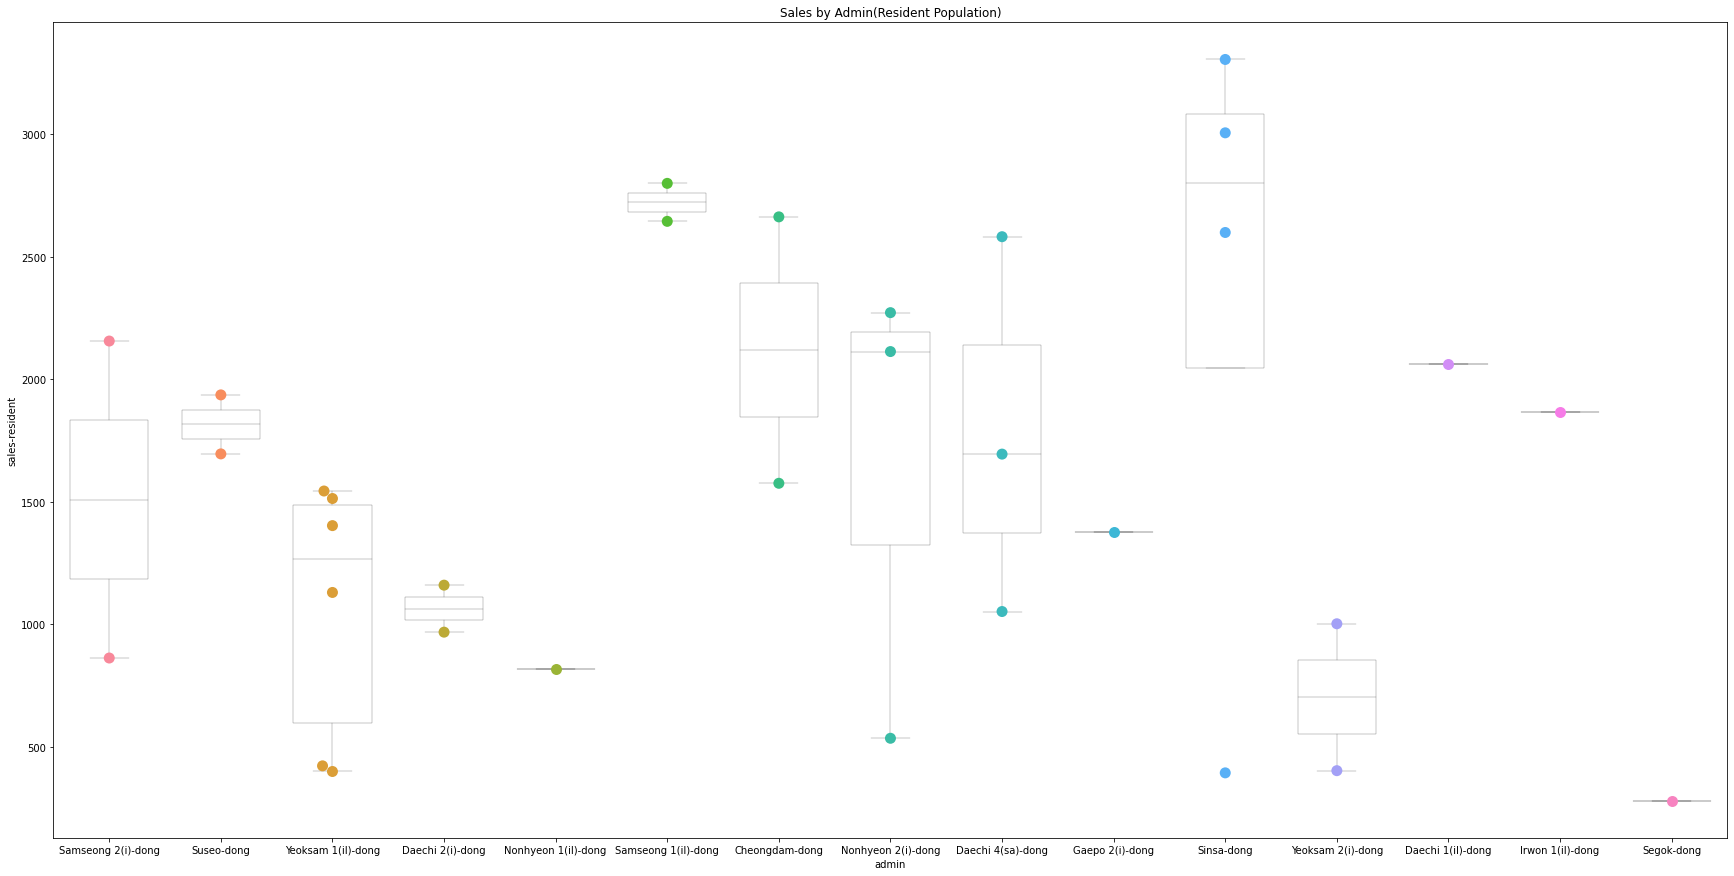

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot swarmplot
plt.figure(figsize=(30, 15))
sns.swarmplot(x="admin", y="sales-resident", data=merge_sales,
              s=11) #마커 크기 조정
plt.title("Sales by Admin(Resident Population)")
plt.xlabel('admin')

#plot boxplot
sns.boxplot(data=merge_sales, x="admin", y="sales-resident",
            boxprops={'facecolor':'None'}, #색상비우기
            showfliers=False, #아웃라이어 표시 취소
            linewidth = 0.3, #box line 굵기 조정
            width = 0.7) #박스 두께 조절

#plt.savefig('Sales by Admin(Resident Population).png', dpi=300)

시각화(매출/일평균유동인구)

<AxesSubplot:title={'center':'Sales by Admin(Floating Population)'}, xlabel='admin', ylabel='sales-floating'>

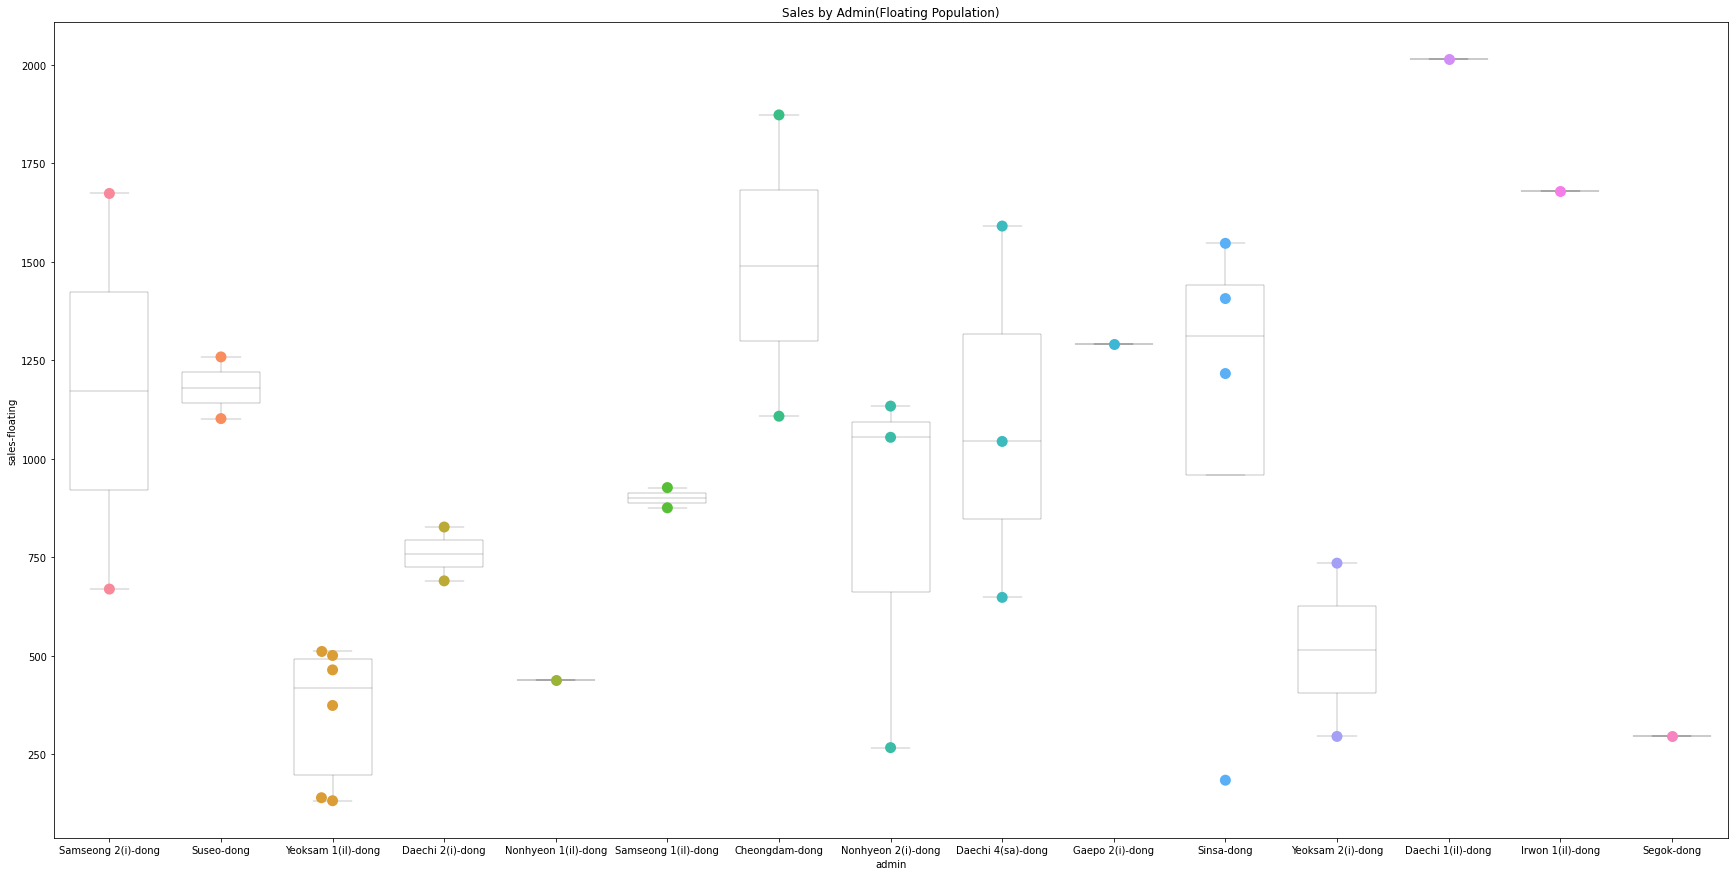

In [9]:
#plot swarmplot
plt.figure(figsize=(30, 15))
sns.swarmplot(x="admin", y="sales-floating", data=merge_sales,
              s=11) #마커 크기 조정
plt.title("Sales by Admin(Floating Population)")
plt.xlabel('admin')

#plot boxplot
sns.boxplot(data=merge_sales, x="admin", y="sales-floating",
            boxprops={'facecolor':'None'}, #색상비우기
            showfliers=False, #아웃라이어 표시 취소
            linewidth = 0.3, #box line 굵기 조정
            width = 0.7) #박스 두께 조절

#plt.savefig('Sales by Admin(Floating Population).png', dpi=300)

유사도 계산

In [20]:
#유클리디안 거리
import numpy as np

def dist(x, y):
     return np.linalg.norm(x-y) #유클리드 거리 계산 공식
#Y값이 같으니까 그냥 최대값에서 최솟값만 빼면 되는 건가?

삼성2동: 1293.684592
